<a href="https://colab.research.google.com/github/xiantail/py4fi2nd/blob/master/01_why_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Why Python for Finance?

## Zen of Python

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## The Python Ecosystem

In [2]:
100 * 2.5 + 50

300.0

In [0]:
# causes intentional error
# log(1)  

In [0]:
import math  

In [5]:
math.log(1)  

0.0

## Finance and Python Syntax

In [0]:
import math
import numpy as np  

In [0]:
S0 = 100.  
K = 105.  # <2
T = 1.0  
r = 0.05  
sigma = 0.2  

In [0]:
I = 100000  

In [0]:
np.random.seed(1000)  

In [0]:
z = np.random.standard_normal(I)  

In [0]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)  

In [0]:
hT = np.maximum(ST - K, 0)  

In [0]:
C0 = math.exp(-r * T) * np.mean(hT)  

In [14]:
print('Value of the European call option: {:5.3f}.'.format(C0))  

Value of the European call option: 8.019.


In [0]:
# %run bsm_mcs_euro.py
# You will get ERROR:root:File `'bsm_mcs_euro.py'` not found.

ERROR:root:File `'bsm_mcs_euro.py'` not found.


To avoid 'not found' errors, we need special treatments so that we can access the file directly. 

In [16]:
# Constants as Preparation
import os
REPO = 'yhilpisch/py4fi2nd'  #Replace with your target Github Repository
ROOT_PATH = 'https://raw.githubusercontent.com/' + REPO + '/master/'  #Raw files are located here

# Repository specific information
CODE_PATH = os.path.join(ROOT_PATH, 'code')
CHAPTER = 'ch01'
SOURCE_PATH = os.path.join(ROOT_PATH, 'source')

# Get bsm_mcs_euro.py
target_code = os.path.join(CODE_PATH, CHAPTER, 'bsm_mcs_euro.py')
print(target_code)


https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/code/ch01/bsm_mcs_euro.py


In [0]:
# Fetch the file from raw file in Github
#!curl --remote-name https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/code/ch01/bsm_mcs_euro.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   755  100   755    0     0   4748      0 --:--:-- --:--:-- --:--:--  4748


In [17]:
# Alternative way using subprocess
import subprocess
cmd = 'curl --remote-name ' + target_code
subprocess.run(cmd.split())

CompletedProcess(args=['curl', '--remote-name', 'https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/code/ch01/bsm_mcs_euro.py'], returncode=0)

In [18]:
# Then run the code
%run bsm_mcs_euro.py

Value of the European call option 7.989.


## Time-to-Results

In [0]:
import numpy as np  
import pandas as pd  
from pylab import plt, mpl  

In [0]:
plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  
%matplotlib inline

In [21]:
#data = pd.read_csv('../../source/tr_eikon_eod_data.csv',
SOURCE_FILE_PATH = os.path.join(SOURCE_PATH, 'tr_eikon_eod_data.csv')
data = pd.read_csv(SOURCE_FILE_PATH,
                  index_col=0, parse_dates=True)  
data = pd.DataFrame(data['.SPX']) 
data.dropna(inplace=True)  
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
.SPX    2138 non-null float64
dtypes: float64(1)
memory usage: 33.4 KB


In [0]:
data['rets'] = np.log(data / data.shift(1))  
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)  

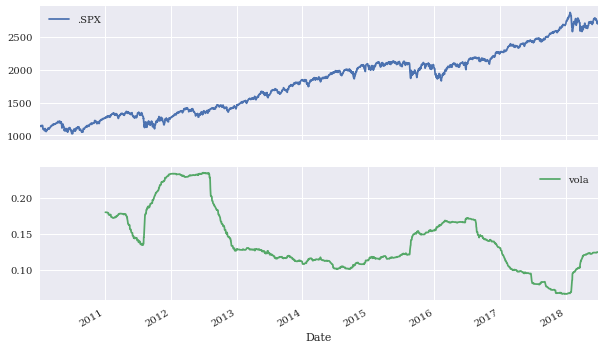

In [23]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));  
# plt.savefig('../../images/ch01/spx_volatility.png')

## Idioms & Paradigms

In [25]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

1 loop, best of 3: 1.24 s per loop


In [26]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

10 loops, best of 3: 130 ms per loop


In [27]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

10 loops, best of 3: 115 ms per loop


In [28]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

10 loops, best of 3: 96.3 ms per loop


## Data-Driven & AI-First Finance

### Data-Driven Finance 

**This sub-section requires a Eikon license. Therefore no code is provided.**

### AI-First Finance 

In [0]:
import numpy as np
import pandas as pd

In [0]:
#data = pd.read_csv('../../source/tr_eikon_eod_data.csv',
SOURCE_FILE_PATH = os.path.join(SOURCE_PATH, 'tr_eikon_eod_data.csv')
data = pd.read_csv(SOURCE_FILE_PATH,
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])  
data['Returns'] = np.log(data / data.shift())  
data.dropna(inplace=True)

In [0]:
lags = 6

In [0]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))  
    cols.append(col)
data.dropna(inplace=True)

In [0]:
from sklearn.svm import SVC

In [0]:
model = SVC(gamma='scale')  

In [36]:
model.fit(data[cols], np.sign(data['Returns']))  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
data['Prediction'] = model.predict(data[cols])  

In [0]:
data['Strategy'] = data['Prediction'] * data['Returns']  

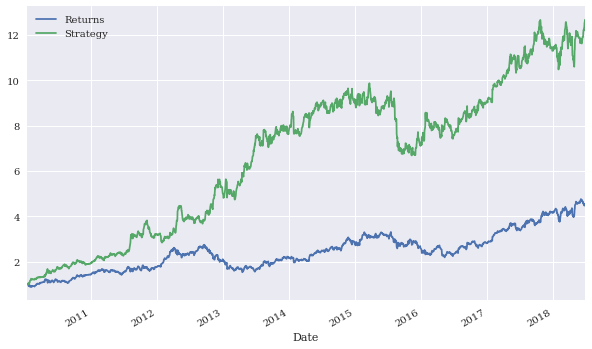

In [39]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch01/AAPL_trading_strategy.png');

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>